In [1]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
np.random.seed(42)

In [3]:
def count_sort(arr):
    max_val = np.max(arr) if arr.size > 0 else 0  
    count = np.zeros(max_val + 1, dtype=int)

    for num in arr:
        count[num] += 1

    sorted_arr = []
    for i in range(len(count)):
        sorted_arr.extend([i] * count[i])
    
    return np.array(sorted_arr)

In [4]:
def radix_sort(arr):
    if arr.size == 0:
        return arr
    
    max_num = np.max(arr)  
    
    exp = 1  
    while max_num // exp > 0:
        count_sort_radix(arr, exp)
        exp *= 10
    
    return arr

In [5]:
def count_sort_radix(arr, exp):
    n = arr.size
    output = np.zeros(n, dtype=int)
    count = np.zeros(10, dtype=int)  

    for i in range(n):
        index = (arr[i] // exp) % 10
        count[index] += 1

    for i in range(1, 10):
        count[i] += count[i - 1]

    for i in range(n - 1, -1, -1):
        index = (arr[i] // exp) % 10
        output[count[index] - 1] = arr[i]
        count[index] -= 1

    for i in range(n):
        arr[i] = output[i]

In [6]:
def measure_time(sort_function, arr):
    start_time = time.time()
    sort_function(arr.copy())
    return time.time() - start_time

In [7]:
A = np.random.randint(0, 100000000, 10)
B = A

In [8]:
start = time.time()
count_sort(A)
end = time.time()
print (end - start)

25.337631225585938


In [9]:
start = time.time()
radix_sort(B)
end = time.time()
print (end - start)

0.009613513946533203


In [15]:
sizes = [0, 20000, 40000, 60000, 80000, 100000]
count_sort_times =[]
radix_sort_times =[]

In [16]:
for size in sizes:
    arr = np.random.randint(0, 100000, size)
    
    time_count_sort = measure_time(count_sort, arr)
    count_sort_times.append(time_count_sort)
    
    time_radix_sort = measure_time(radix_sort, arr)
    radix_sort_times.append(time_radix_sort)

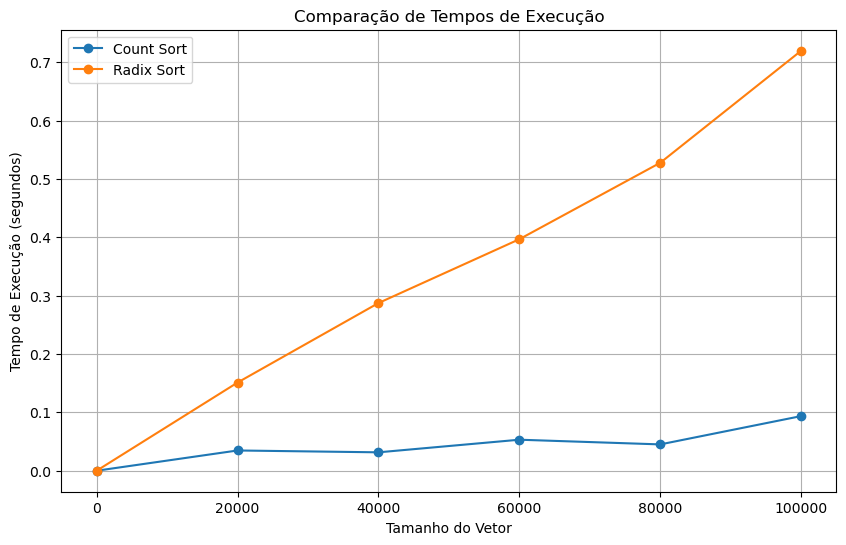

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(sizes, count_sort_times, marker='o', label='Count Sort')
plt.plot(sizes, radix_sort_times, marker='o', label='Radix Sort')
plt.title('Comparação de Tempos de Execução')
plt.xlabel('Tamanho do Vetor')
plt.ylabel('Tempo de Execução (segundos)')

plt.legend()
plt.grid(True)
plt.show()